In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
from Legendre import *
from Library import * 
from ipywidgets import interact

In [3]:
data = Cn2.read_csv('/scratchm/eklotz/Cn2_Tenerife_2020_fromSoundings.csv')
data.rm_zeros()
data.set_ground_level(inplace = True)
data.filtre(50)

Applying filter : 
100%|██████████| 714/714 [00:00<00:00, 740.05it/s]


In [92]:
def pp(date, nbsegments, nbpoints_per_segment):
    r0 = lambda x, t : np.power((0.423*(2*np.pi/1.55e-6)**2*simps(x, t)), (-3/5))
    theta0 = lambda x, t : np.power((2.914*(2*np.pi/1.55e-6)**2 * simps(x*np.power(t, (5/3)), t)), (-3/5))*1e6
    alt = data[date].alt.values
    cn2 = data[date].Cn2.values
    plt.figure(figsize=(10,10))
    print(f'Integrale du profil brut : {simps(cn2, alt)}')
    print(f'r0 du profil brut : {r0(cn2, alt):.4f} cm ')
    print(f'theta0 du profil brut : {theta0(cn2, alt):.4f} µrad ')

    plt.semilogx(cn2, alt, label = 'Raw Cn2 profile')
    if nbsegments >1:
        alt = np.array_split(alt, nbsegments)
        cn2 = np.array_split(cn2, nbsegments)
        roots, res = interp_gauss_legendre_pp(nbpoints_per_segment, alt, cn2)
        for k in alt:
            plt.axhline(k[0], linestyle='--', color = 'grey', linewidth = 0.5)
    else : 
        roots, res = interp_gauss_legendre(nbpoints_per_segment, alt, cn2, norm=True)

    plt.semilogx(res, roots, label = 'Interpolated Cn2 profile')
    print(f'Integrale du profil interpolé : {simps(res, roots)}')
    print(f'r0 du profil interpolé : {r0(res, roots):.4f} cm')
    print(f'theta0 du profil brut : {theta0(res, roots):.4f} µrad ')
    plt.xlabel('Cn2')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()


In [93]:
interact(pp, date = data.dates, nbsegments = 10, nbpoints_per_segment = 10)

interactive(children=(Dropdown(description='date', options=('2020-01-01 11:00:00', '2020-01-01 23:00:00', '202…

<function __main__.pp(date, nbsegments, nbpoints_per_segment)>

In [95]:
data.moments().describe()

,r0,seeing,theta0,tau0
count,714.000000,714.000000,714.000000,714.000000
mean,0.108189,0.000016,7.654886,0.003829
std,0.038604,0.000007,17.712119,0.001894
min,0.016778,0.000003,3.952443,0.000670
25%,0.082525,0.000012,6.012445,0.002553
50%,0.106844,0.000014,6.674322,0.003394
75%,0.129761,0.000018,7.404670,0.004652
max,0.522519,0.000091,470.129160,0.022089


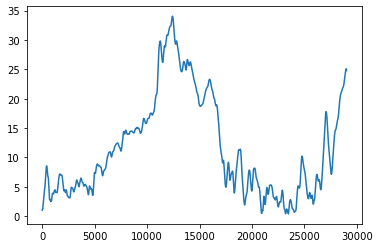

In [98]:
plt.plot(data[100].alt.values, data[100].wspeed.values)